# Mathematik 1: Differentialrechnung - Ableitungen, Kettenregel

In der Künstlichen Intelligenz versuchen wir möglichst nahe an die Wirklichkeit heranzukommen. Dabei sind Abschätzungen recht häufig, genau wie wir als "echte intelligente Wesen" vorgehen. Aus vielen Daten versuchen wir das wesentliche zu erkennen - und irren uns dabei auch so maches Mal.

Mathematische gesehen wollen wir unsere Fehler möglichst klein halten. Mit sehr kleinen Werten befasst sich die Differentialrechnung, und die haben wir schon in der Schule gelernt. Auf dieser Seite gibt es eine kleine Auffrischung dazu, aber nur zu den Dingen, die wir wirklich brauchen. 

### Die Ableitung einer Funktion

Die Ableitung einer Funktion gibt die Änderungsrate der Funktion an einer Stelle an. Ist sie positiv, so steigt die Funktion an, ist sie negativ, so steigt sie,wobei die größe des Werts anzeigt, wie schnell dies geschieht. Ist die Ableitung 0, so befindet man sich entweder auf einem Gipfel oder in einem Tal, d.h. die Funktion hat entweder ein Maximum oder ein Minimum.

Die Ableitung einer Funktion $F$ an einem Punkt $x$ ist definiert als

$$f'(x) := \lim_{\Delta x \rightarrow 0} \frac{f(x - \Delta x) - (x + \Delta x)}{2 \Delta x}.$$

Das brauchen wir uns aber nicht zu merken,denn es gibt einfache Regeln für die Art Funktionen, die uns interessiert. Merken sollten wir uns aber noch die zweite Schreibweise für die Ableitung:

$$f'(x) = \frac{df}{dx}(x)$$

### Häufig gebrauchte Ableitungen

Wir arbeiten im folgenden vor allem mit **Polynomen** und der **Exponentialfunktion**.
Für diese beiden Funktionen muss man sich lediglich merken:

* die Ableitung einer konstanten Funktion ist 0
* die Ableitung der Funktion $f(x) = a_k x^k$ ist $f'(x) = k a_k x^{k-1}$
* die Ableitung der Exponentialfunktion $e^x$ ist wieder $e^x$.



### Summen- und Kettenregel

Häufig werden Kombinationen aus Funktionen gebildet.

#### Summenregel
Ein Polynom ist nichts anderes als eine Summe von Funktionen der Form $a_k x^k$. Die Ableitung solcher Summen von Funktionen bildet man einfach, indem jeder Summand einzeln abgeleitet wird. Es gilt also für Polynome $P(x) = \sum_{k=0}^1 a_kx^k$:
$$P'(x)  = \sum_{k=0}^1 k a_k x^{k-1}$$

#### Kettenregel

Werden Funktionen hintereinander ausgefürt, so kommt die Kettenregel zum Einsatz. Auch bei der internen rechnung in KNNSwerden Funktionen auf diese Weise verknüpft. Wird zum Beispiel eine Fuktion $g$ *nach* einer Funktion $f$ aufgeführt, so schreiben wir $(g \circ f)(x) = g(f(x))$. Für die Abletung dieser Funktion gilt dann:
$$(g \circ f)' (x) = g'(f(x)) f'(x)$$

Es wird also sowohl die Ableitung von $g$ als auch von $f$ gebildet und beides miteinander multipliziert. 

<div class='alert alert-block alert-success'>Mit der <b>Kettenregel</b> werden wir viel zu tun haben.</div>


### Numerische Ableitung mit Python

Wir können mit Hilfe des NumPy-Pakets die einzelnen Regeln fast 1 zu 1 übernehmen und hinschreiben.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ableitung(f,x,dx = 0.001):
    '''Ableitung einer Funktion f'''
    return (f(x + dx) - f(x - dx)) / (2 * dx)

def ketten_funktion(fs,x):
    '''Wertet mehrere Funktionen nacheinander verkettet aus.  '''
    for f in fs:
        x = f(x)
    return x    

def kettenregel(fs,x):
    '''Verwendet die Kettenregel, um die Ableitung mehrerer verketteter Funktionen zu berechnen. ''' 
    d,v = np.ones(len(x)),x
    
    for n,f in enumerate(fs):
        d *= ableitung(f,v)
        v = f(v)  
    return d

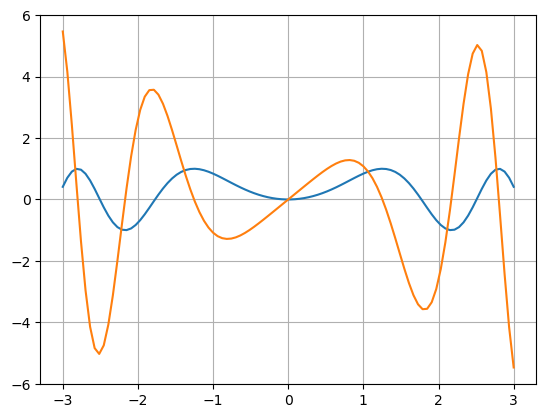

In [6]:
x = np.linspace(-3,3,100)

kette = [lambda x: x**2,lambda x:np.sin(x)]

f = lambda x: ketten_funktion(kette,x)
df = lambda x : kettenregel(kette,x)

plt.grid()
plt.plot(x,f(x))
plt.plot(x,df(x))

plt.show()